In [1]:
import numpy 
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def ftcs(T, nt, alpha, dt, dx, dy):
    """Discretize 2D heat eqn. with Forward time, central space scheme
    
    Returns:
        - Temperature across plate at time T
    """
    j_mid = (numpy.shape(T)[0])/2
    i_mid = (numpy.shape(T)[1])/2
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1, 1:-1] = Tn[1:-1, 1:-1] + alpha *\
        (dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1, 1:-1] + Tn[:-2, 1:-1]) +\
         dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1, 1:-1] + Tn[1:-1, :-2]))
        
        #Neumann BCs
        T[-1,:] = T[-2,:]
        T[:, -1]= T[:,-2]
        
        #check if center of plate is at T=70C
        if T[j_mid, i_mid] >= 70:
            print("Center of plate reached 70C at time {0:.2f}s".format(dt*n))
            break
        
    if T[j_mid, i_mid] < 70:
        print("Center has not yet reached 70C, it is at {0:.2f}C".format(T[j_mid, i_mid]))
        
    return T

In [3]:
L = 1.0e-2
H = 1.0e-2

nx = 21
ny = 21
nt = 500

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0, L, nx)
y = numpy.linspace(0, H, ny)

alpha = 1e-4

Ti = numpy.ones((ny, nx))*20
Ti[0,:] = 100
Ti[:,0] = 100



In [5]:
sigma = 0.25
dt = sigma*min(dx, dy)**2/alpha
#print(dt)
T = ftcs(Ti.copy(), nt, alpha, dt, dx, dy)

Center of plate reached 70C at time 0.16s


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


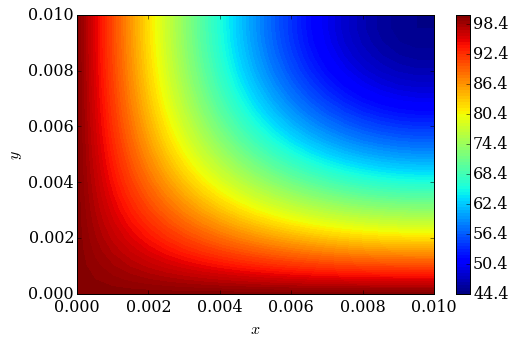

In [8]:
mx, my = numpy.meshgrid(x,y)

pyplot.figure(figsize=(8,5))
pyplot.contourf(mx, my, T, 100)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

A heat sink will need to provide a heat flux equal to what the chip is generating when the center is at 70C. This would be the same as the incoming heat at the left and bottom sides from the boundaries at 100C